In [1]:
from util import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [2]:
cohort08_query = """WITH
T0 AS (
    SELECT * FROM CINS_REACTIVATED_CUST_STT_CHG_01082023),
T1 AS (
    SELECT * FROM CINS_REACTIVATED_SCORE_01082023),
T2 AS (
    SELECT *
        FROM (SELECT T0.*, T1.SCORE
        FROM T0 INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
        WHERE REACTIVATED IS NOT NULL
        AND CUST_STT_LAG <= 1
        ORDER BY SCORE DESC)
    WHERE ROWNUM <= 500000),
T3 AS (
    SELECT *
    FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT),
T4 AS (
    SELECT T2.CUSTOMER_CDE, T3.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T3.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T3.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T3.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T2 INNER JOIN T3 ON T2.CUSTOMER_CDE = T3.CUSTOMER_CDE
    WHERE PROCESS_DT = TO_DATE('31-12-2022', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-01-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('28-02-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-03-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-04-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-05-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-07-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-08-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-09-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-10-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-11-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-12-2023', 'DD-MM-YY')
    GROUP BY T2.CUSTOMER_CDE, T3.PROCESS_DT),
T5 AS (
    SELECT CUSTOMER_CDE, 
    -- RPT_DT
    LAG(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG9,
    LAG(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG8,
    LAG(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG7,
    LAG(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG6,
    LAG(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG5,
    LAG(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG4,
    LAG(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG3,
    LAG(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG2,
    LAG(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG1,
    RPT_DT, 
    LEAD(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD1, 
    LEAD(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD2,
    LEAD(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD3,
    LEAD(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD4,
    LEAD(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD5,
    LEAD(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD6,
    LEAD(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD7,
    LEAD(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD8,
    LEAD(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD9,
    -- STATUS
    LAG(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG9,
    LAG(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG8,
    LAG(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG7,
    LAG(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG6,
    LAG(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG5,
    LAG(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG4,
    LAG(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG3,
    LAG(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG2,
    LAG(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG1,
    CUST_STT, 
    LEAD(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD1,
    LEAD(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD2,
    LEAD(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD3,
    LEAD(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD4,
    LEAD(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD5,
    LEAD(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD6,
    LEAD(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD7,
    LEAD(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD8,
    LEAD(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD9
    FROM T4
),
T6 AS (
    SELECT * FROM T5
    WHERE RPT_DT = TO_DATE('31-07-2023', 'DD-MM-YY')),
T7 AS (
    SELECT T6.*, T2.SCORE
    FROM T6
    INNER JOIN T2 ON T6.CUSTOMER_CDE = T2.CUSTOMER_CDE
    ORDER BY T2.SCORE DESC
)
SELECT * 
FROM T7"""

In [3]:
cohort08 = download_or_reload('data/COHORT_08', cohort08_query)

Len 500000


In [4]:
cohort08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUSTOMER_CDE    500000 non-null  object        
 1   RPT_DT_LAG9     0 non-null       object        
 2   RPT_DT_LAG8     0 non-null       object        
 3   RPT_DT_LAG7     428138 non-null  datetime64[ns]
 4   RPT_DT_LAG6     433900 non-null  datetime64[ns]
 5   RPT_DT_LAG5     440748 non-null  datetime64[ns]
 6   RPT_DT_LAG4     450849 non-null  datetime64[ns]
 7   RPT_DT_LAG3     462368 non-null  datetime64[ns]
 8   RPT_DT_LAG2     475966 non-null  datetime64[ns]
 9   RPT_DT_LAG1     500000 non-null  datetime64[ns]
 10  RPT_DT          500000 non-null  datetime64[ns]
 11  RPT_DT_LEAD1    499866 non-null  datetime64[ns]
 12  RPT_DT_LEAD2    499756 non-null  datetime64[ns]
 13  RPT_DT_LEAD3    499638 non-null  datetime64[ns]
 14  RPT_DT_LEAD4    499557 non-null  dat

In [5]:
cohort08

,CUSTOMER_CDE,RPT_DT_LAG9,RPT_DT_LAG8,RPT_DT_LAG7,RPT_DT_LAG6,RPT_DT_LAG5,RPT_DT_LAG4,RPT_DT_LAG3,RPT_DT_LAG2,RPT_DT_LAG1,...,CUST_STT_LEAD1,CUST_STT_LEAD2,CUST_STT_LEAD3,CUST_STT_LEAD4,CUST_STT_LEAD5,CUST_STT_LEAD6,CUST_STT_LEAD7,CUST_STT_LEAD8,CUST_STT_LEAD9,SCORE
0,18210225,None,None,NaT,NaT,NaT,NaT,NaT,NaT,2023-06-30,...,2.0,2.0,2.0,2.0,2.0,None,None,None,None,1.000000
1,18201319,None,None,NaT,NaT,NaT,NaT,NaT,NaT,2023-06-30,...,2.0,2.0,2.0,2.0,2.0,None,None,None,None,1.000000
2,18210088,None,None,NaT,NaT,NaT,NaT,NaT,NaT,2023-06-30,...,2.0,2.0,2.0,2.0,2.0,None,None,None,None,1.000000
3,18210323,None,None,NaT,NaT,NaT,NaT,NaT,NaT,2023-06-30,...,2.0,2.0,2.0,2.0,2.0,None,None,None,None,1.000000
4,17157675,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,2.0,2.0,2.0,2.0,2.0,None,None,None,None,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,17634442,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0.0,0.0,0.0,0.0,0.0,None,None,None,None,0.001104
499996,17634640,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0.0,0.0,0.0,0.0,0.0,None,None,None,None,0.001104
499997,17634977,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0.0,0.0,0.0,0.0,0.0,None,None,None,None,0.001104
499998,17635048,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0.0,0.0,0.0,0.0,0.0,None,None,None,None,0.001104


In [8]:
def analyze_cohort(cohort):
    len_cohort = len(cohort)
    data = []
    num_react = len(cohort[cohort['CUST_STT'] == 2])
    rpt_dt = cohort['RPT_DT'].tolist()[0]
    cohort = cohort[cohort['CUST_STT'] != 2]
    len_not_react = len(cohort)
    data.append((rpt_dt,num_react, len_not_react))
    if len(cohort) > 0:
        for i in range(1,10):
            if len(cohort) > 0:
                lead_mth = f'CUST_STT_LEAD{i}'
                num_react = len(cohort[cohort[lead_mth] == 2])
                rpt_dt = cohort[f'RPT_DT_LEAD{i}'].tolist()[0]
                cohort = cohort[cohort[lead_mth] != 2]
                len_not_react = len(cohort)
                data.append((rpt_dt,num_react, len_not_react))
    res_df = pd.DataFrame(data=data, columns=['RPT_DT', 'NUM_REACT', 'NUM_NOT_REACT'])
    res_df['PERC_REACT_PREV_MOB'] = res_df['NUM_REACT'].shift(-1) / res_df['NUM_NOT_REACT']
    res_df['PERC_REACT_PREV_MOB'] = res_df['PERC_REACT_PREV_MOB'].shift()
    res_df['CUMSUM'] = res_df['NUM_REACT'].cumsum()
    res_df['PERC'] = res_df['CUMSUM'] / len_cohort
    res_df = res_df[res_df['RPT_DT'].notnull()]
    ax = sns.barplot(res_df, x='RPT_DT', y='NUM_REACT')
    sns.lineplot(res_df['CUMSUM'], ax=ax)
    plt.show()
    return res_df

10000


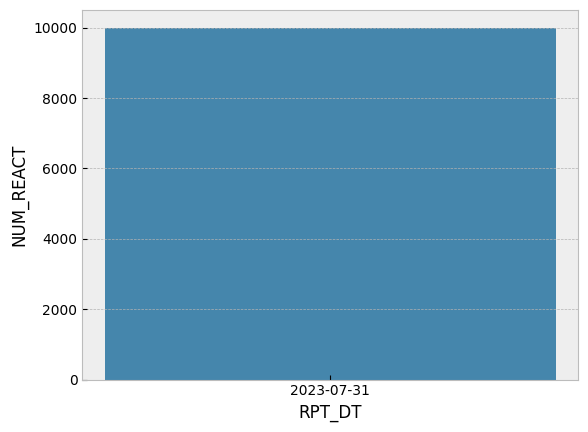

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,10000,0,NaN,10000,1.0


50000


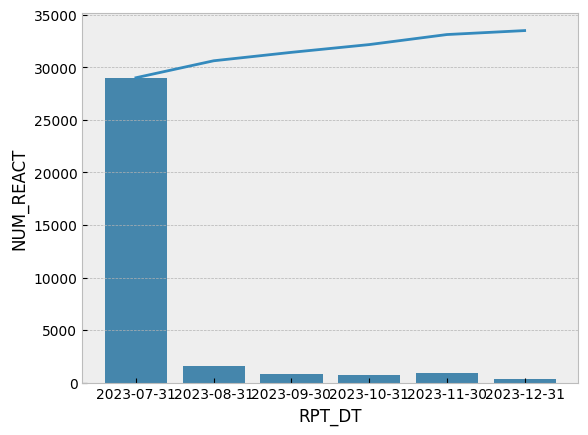

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,29015,20985,NaN,29015,0.58030
1,2023-08-31,1615,19370,0.076960,30630,0.61260
2,2023-09-30,803,18567,0.041456,31433,0.62866
3,2023-10-31,738,17829,0.039748,32171,0.64342
4,2023-11-30,956,16873,0.053621,33127,0.66254
5,2023-12-31,377,16496,0.022343,33504,0.67008


100000


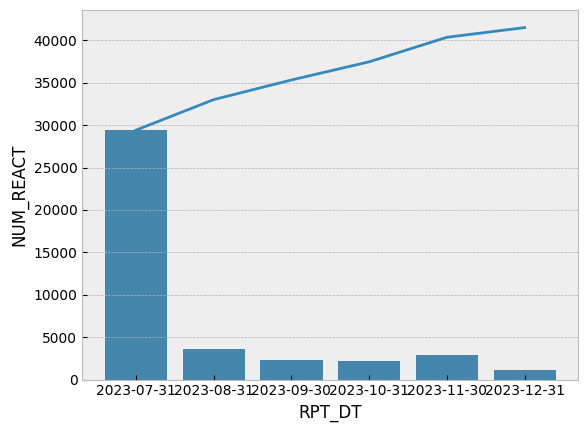

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,29415,70585,NaN,29415,0.29415
1,2023-08-31,3599,66986,0.050988,33014,0.33014
2,2023-09-30,2316,64670,0.034574,35330,0.35330
3,2023-10-31,2142,62528,0.033122,37472,0.37472
4,2023-11-30,2894,59634,0.046283,40366,0.40366
5,2023-12-31,1143,58491,0.019167,41509,0.41509


200000


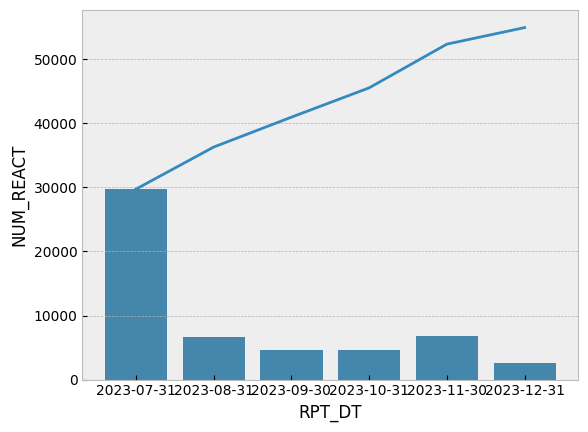

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,29726,170274,NaN,29726,0.148630
1,2023-08-31,6569,163705,0.038579,36295,0.181475
2,2023-09-30,4666,159039,0.028502,40961,0.204805
3,2023-10-31,4580,154459,0.028798,45541,0.227705
4,2023-11-30,6822,147637,0.044167,52363,0.261815
5,2023-12-31,2582,145055,0.017489,54945,0.274725


300000


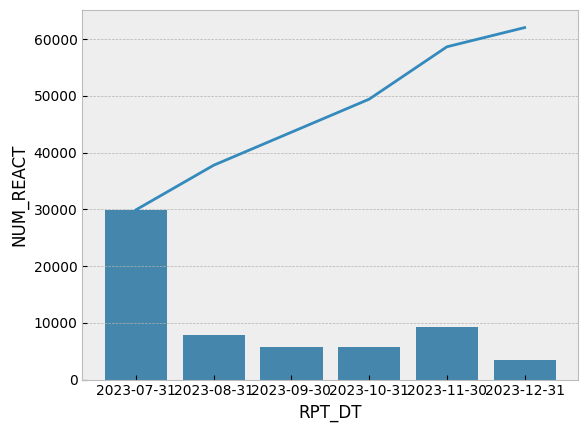

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,29907,270093,NaN,29907,0.099690
1,2023-08-31,7865,262228,0.029120,37772,0.125907
2,2023-09-30,5821,256407,0.022198,43593,0.145310
3,2023-10-31,5821,250586,0.022702,49414,0.164713
4,2023-11-30,9232,241354,0.036842,58646,0.195487
5,2023-12-31,3382,237972,0.014013,62028,0.206760


500000


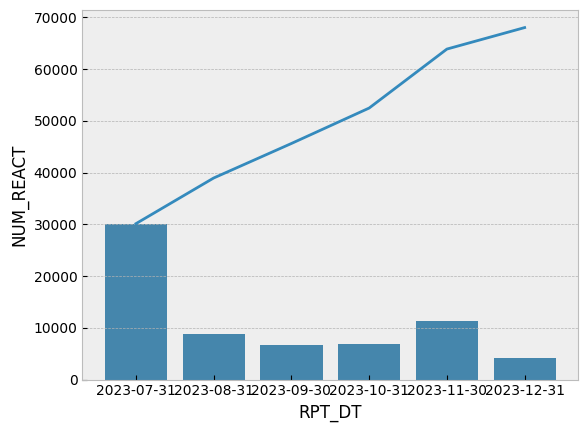

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,30140,469860,NaN,30140,0.060280
1,2023-08-31,8825,461035,0.018782,38965,0.077930
2,2023-09-30,6674,454361,0.014476,45639,0.091278
3,2023-10-31,6850,447511,0.015076,52489,0.104978
4,2023-11-30,11400,436111,0.025474,63889,0.127778
5,2023-12-31,4153,431958,0.009523,68042,0.136084


In [9]:
for limit in [10000, 50000, 100000, 200000, 300000, 500000]:
    print(limit)
    res_df = analyze_cohort(cohort08[:limit])
    display(res_df)